In [168]:
import pandas as pd 
df=pd.read_csv('Wholesale customers data.csv')

In [169]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [141]:
df.shape

(440, 8)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [143]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [174]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [175]:
df.shape

(440, 8)

In [176]:
df1.shape

(414, 8)

In [177]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


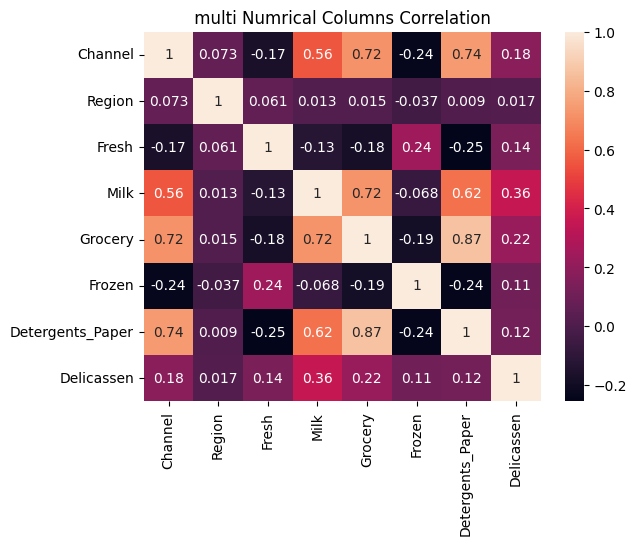

In [178]:
sns.heatmap(df1.corr(),annot=True);
plt.title(" multi Numrical Columns Correlation ");
plt.show()

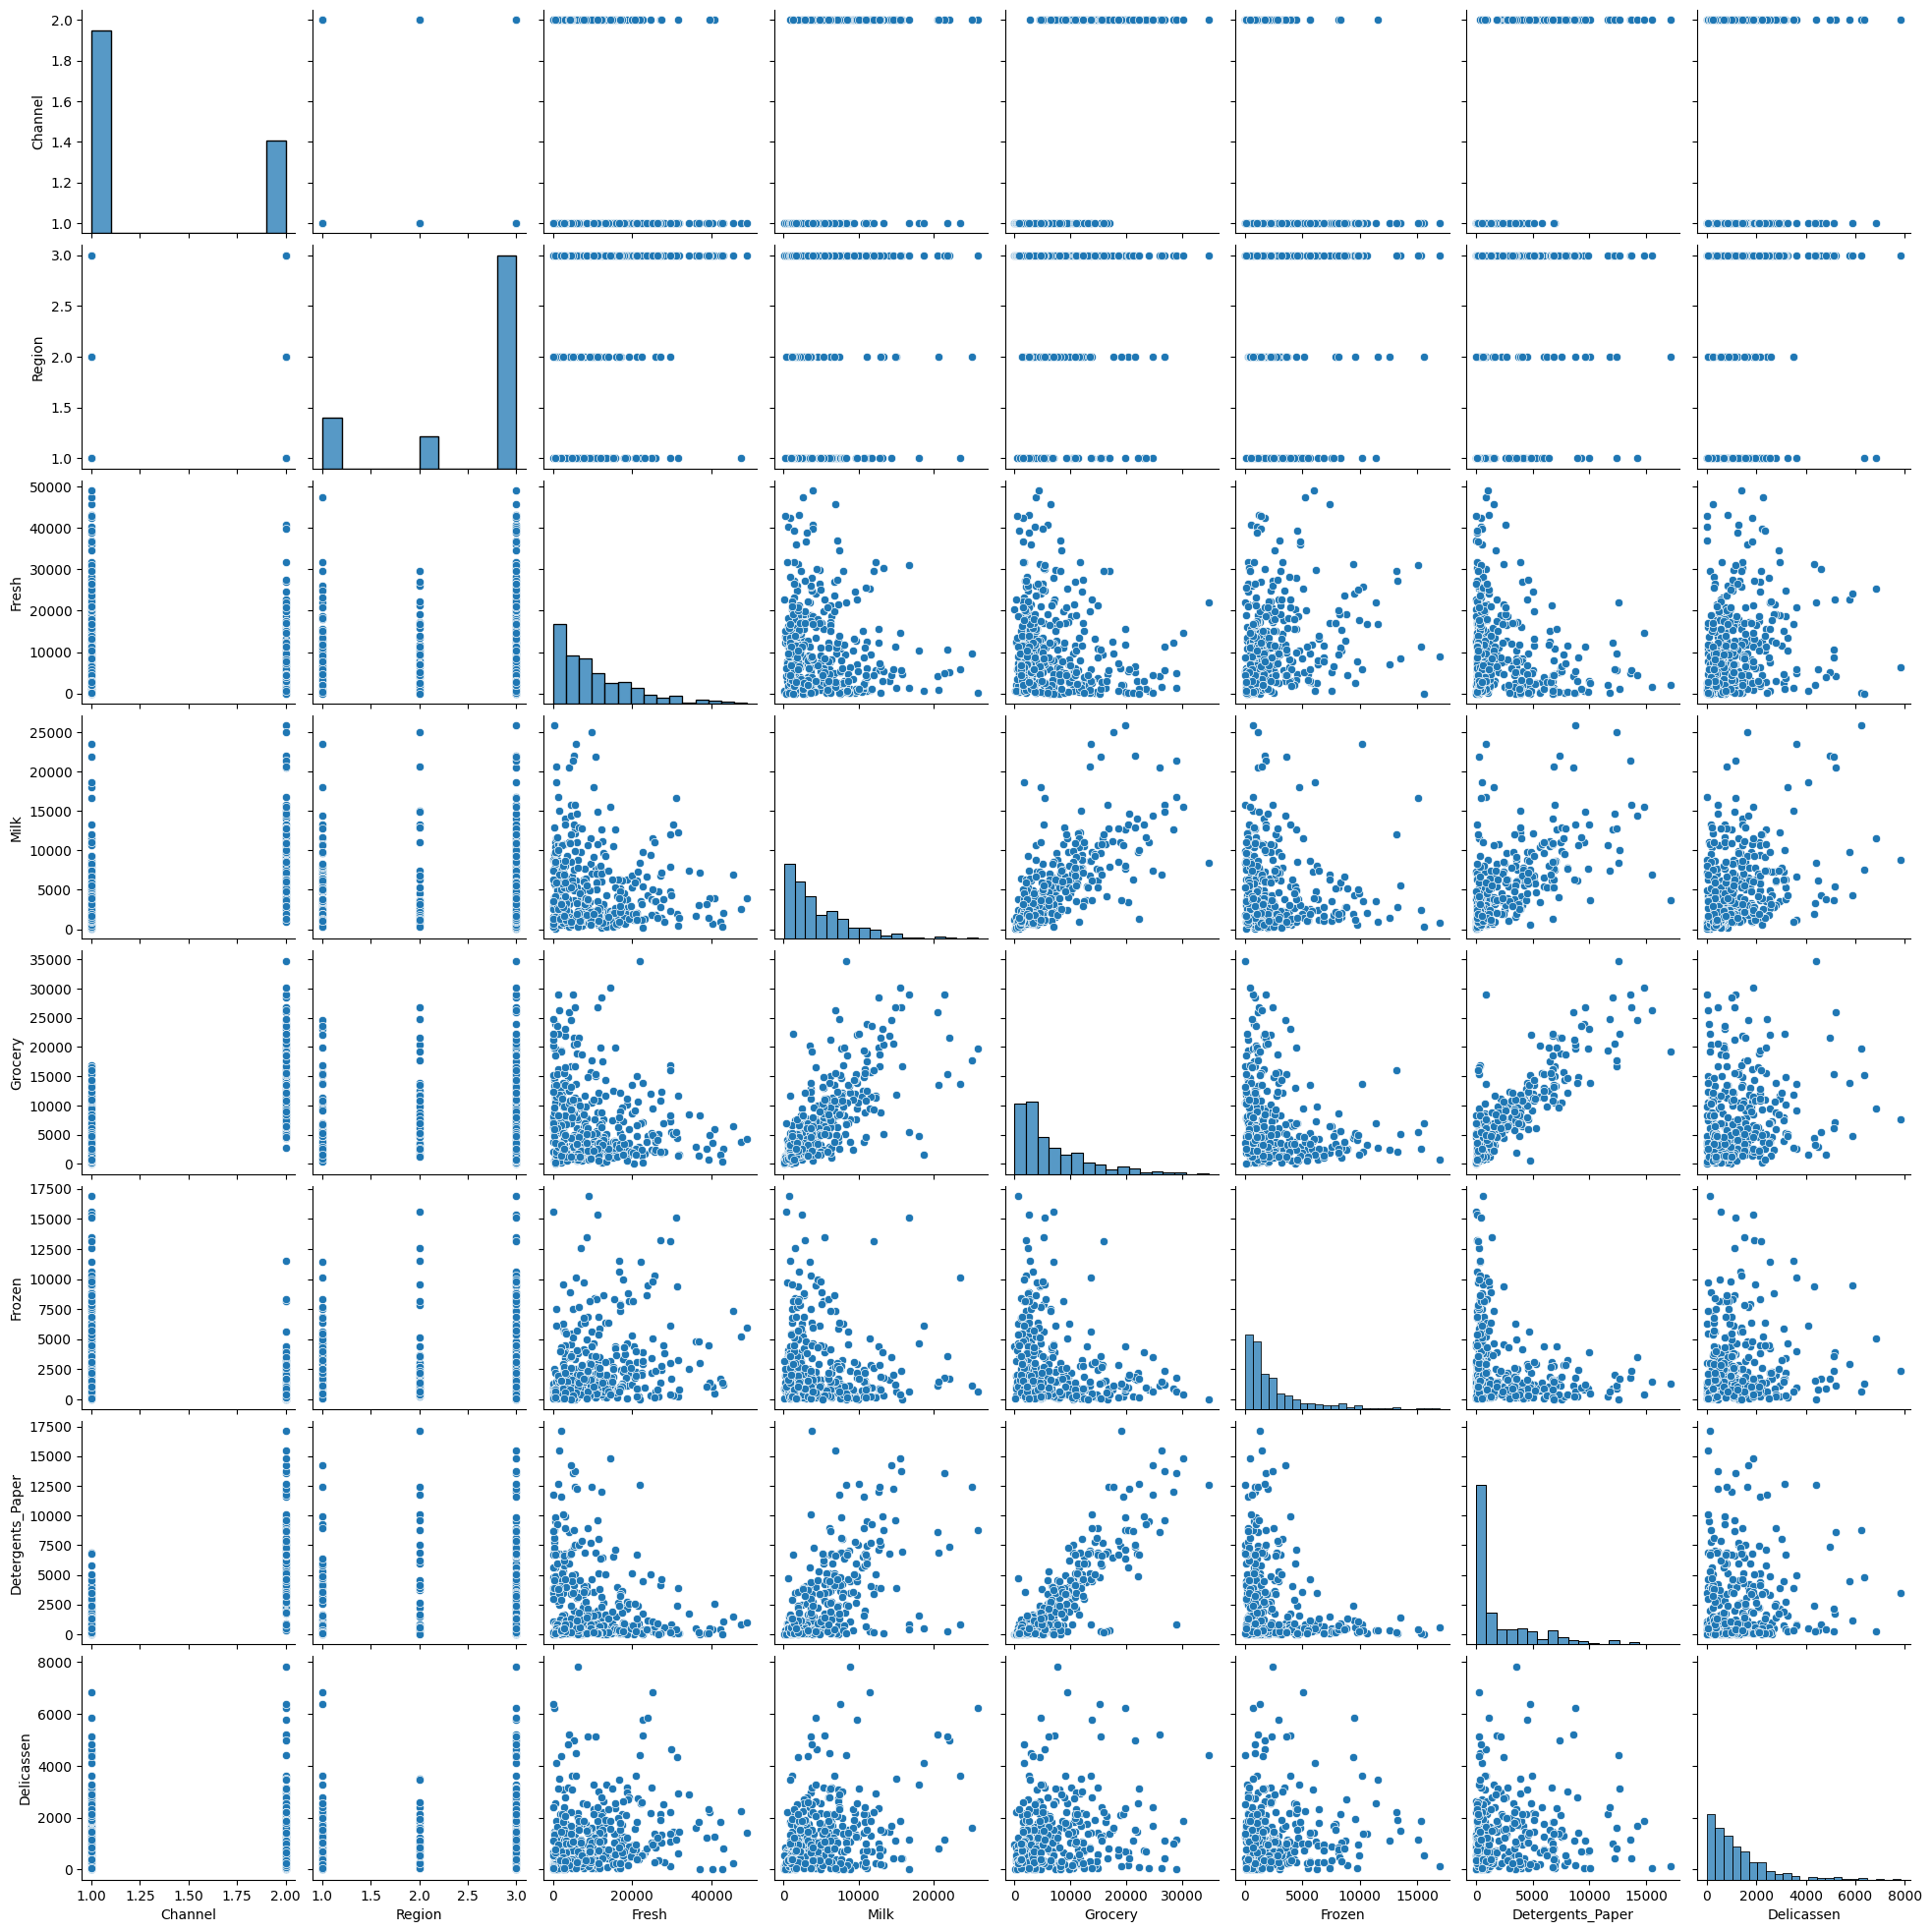

In [179]:
sns.pairplot(df1);

# K-Means_Clustering

In [180]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

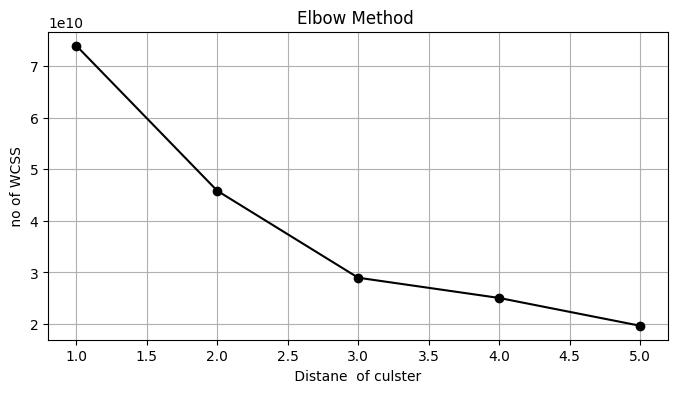

 k=2 38.63069667337126
 k=3 39.94680699851336
 k=4 32.79920816395619
 k=5 33.36975218281111


In [181]:
wcss=[]
for i in range(1,6):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(df1)
    wcss.append(km.inertia_)
plt.figure(figsize=(8,4))
plt.plot(range(1,6),wcss,marker='o',color='black');
plt.grid()
plt.title('Elbow Method ')
plt.xlabel(" Distane  of culster ")
plt.ylabel(" no of WCSS ")
plt.show()

for i in  range(2,6):
    km=KMeans(n_clusters=i,random_state=42)
    labels=km.fit_predict(df1)
    score=silhouette_score(df1,labels)
    print(f" k={i} {score*100}")


In [182]:
km=KMeans(n_clusters=3,random_state=42)
df1['group']=km.fit_predict(df1)

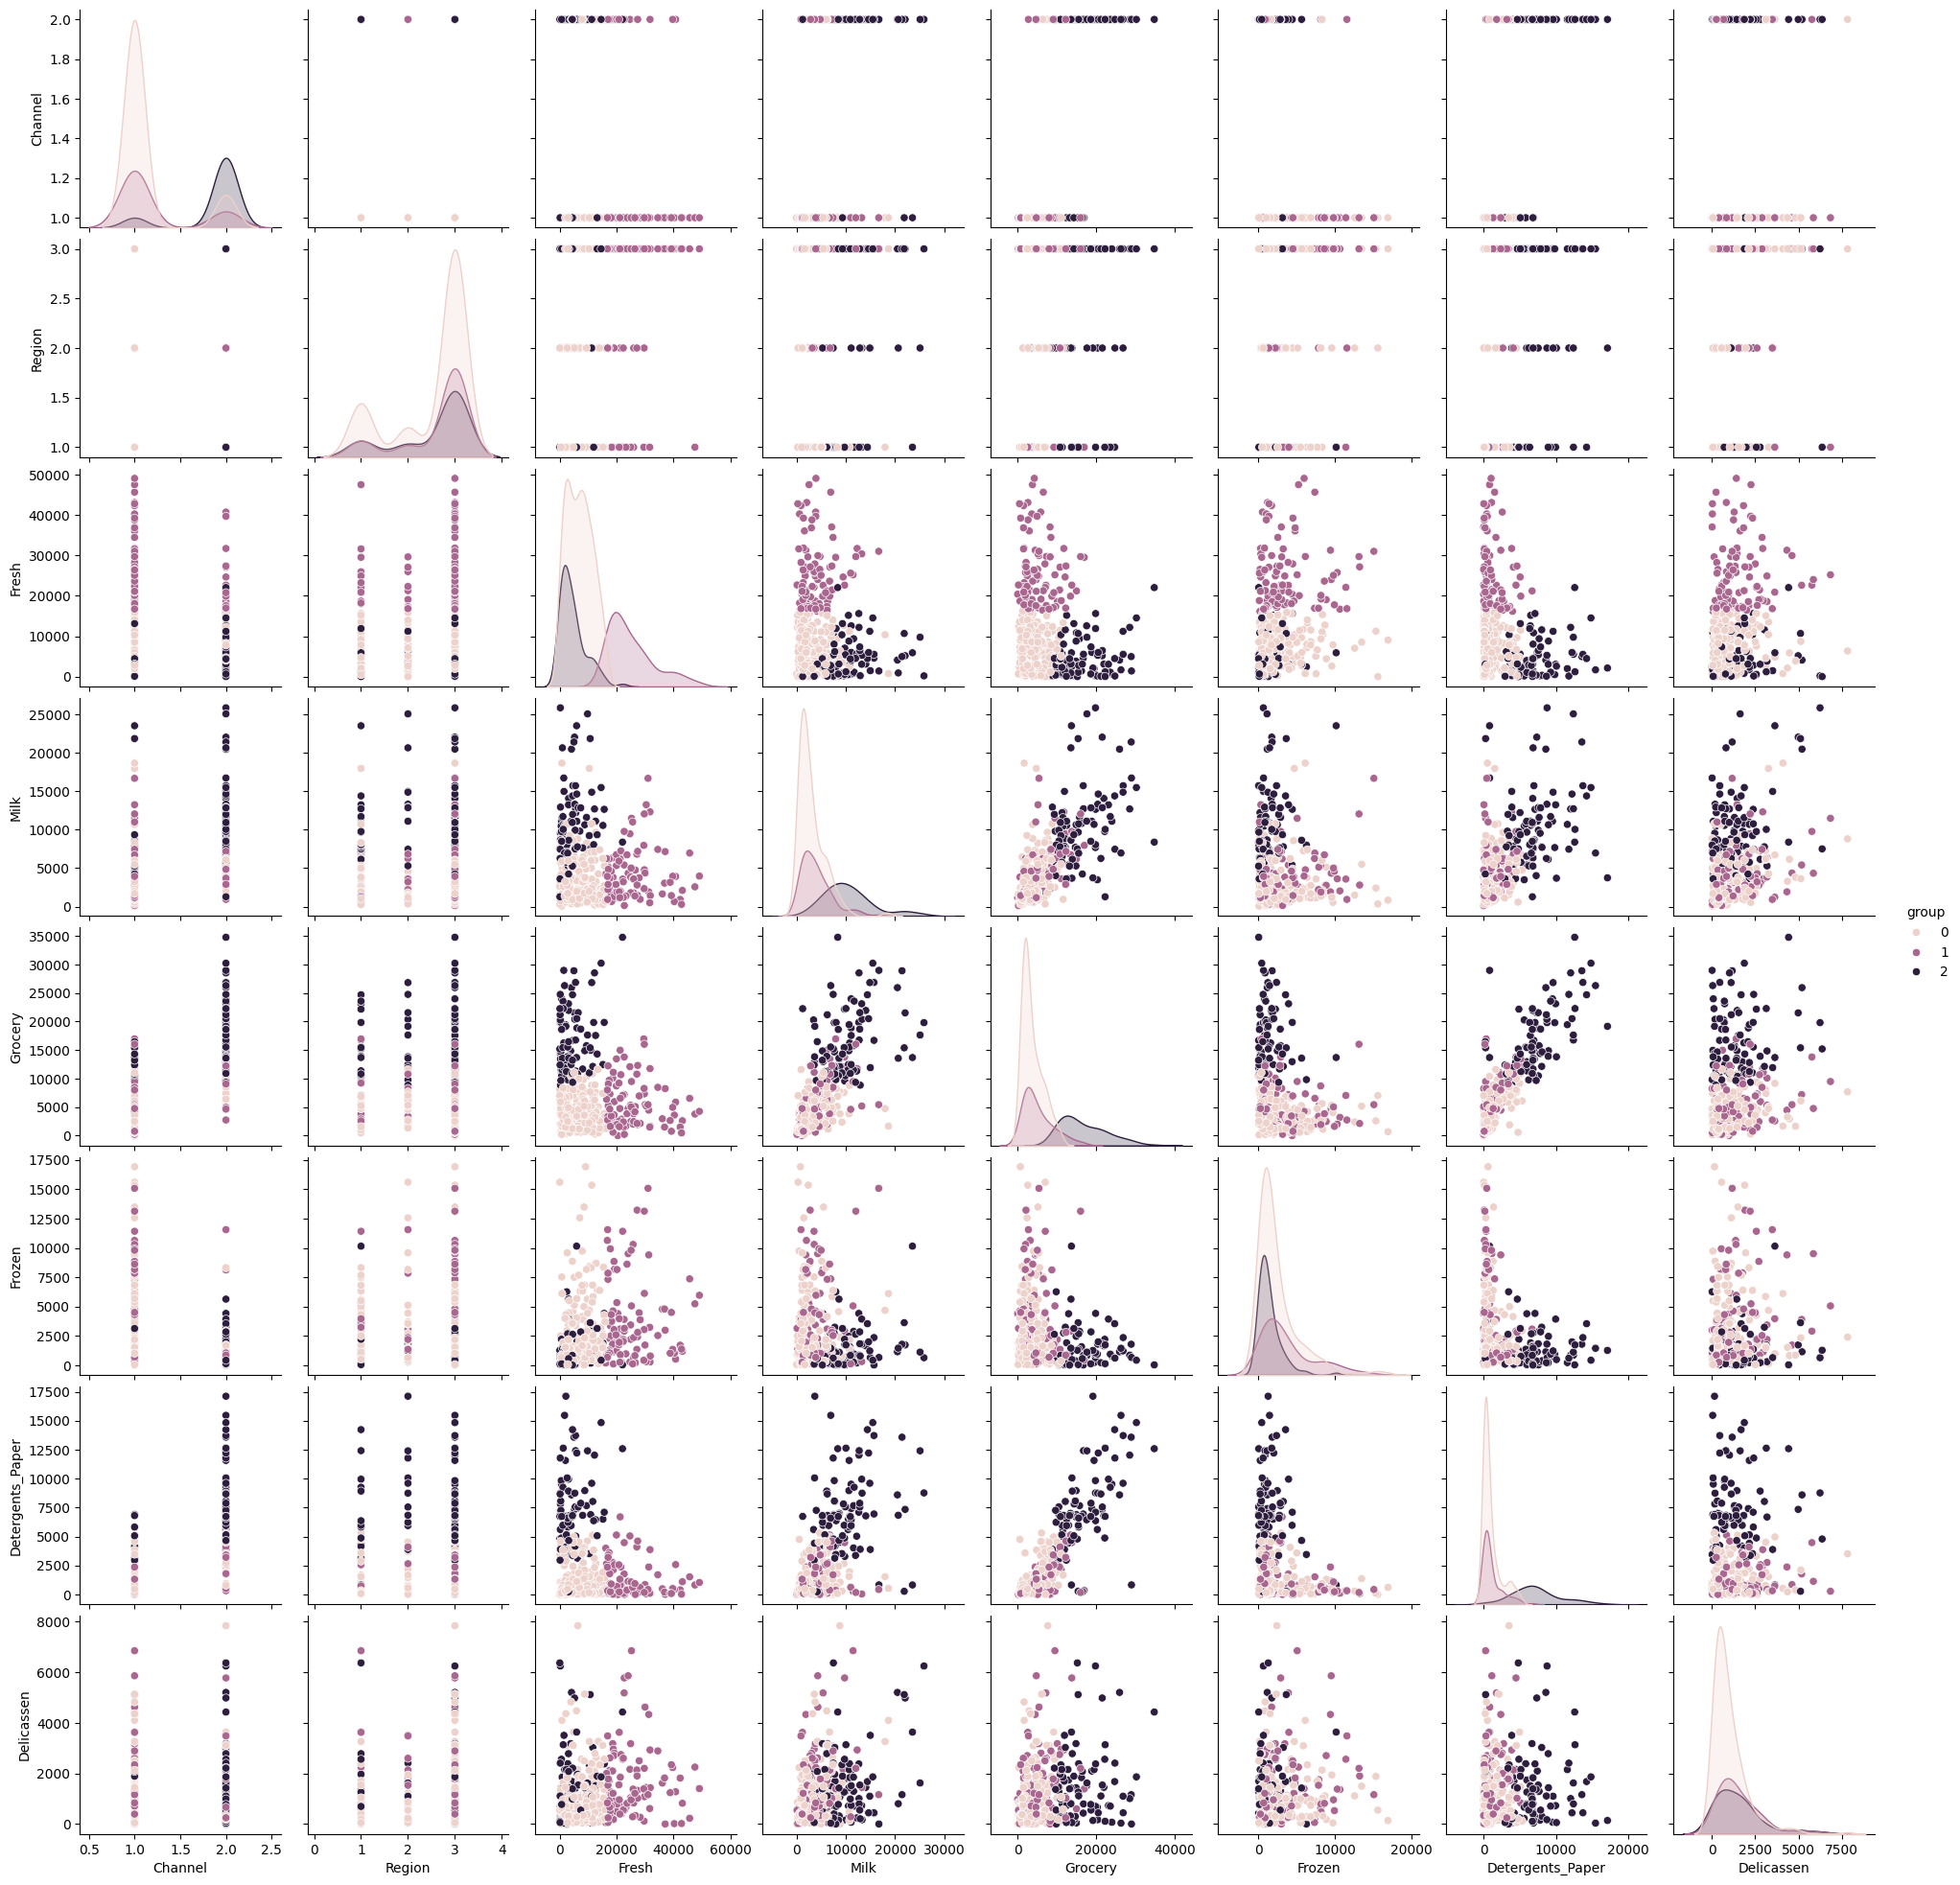

In [183]:
sns.pairplot(df1,hue='group');

In [184]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [185]:
pca=PCA(n_components=2)
scale=StandardScaler()
x=scale.fit_transform(df1.iloc[:,:-1])
dfo=pd.DataFrame(pca.fit_transform(x),columns=['PCA1','PCA2'])
kmm=KMeans(n_clusters=3,random_state=42)
kmm.fit(dfo)
dfo['group']=kmm.predict(dfo)
print(f" {pca.explained_variance_ratio_ *100}")


 [41.51548435 17.06854136]


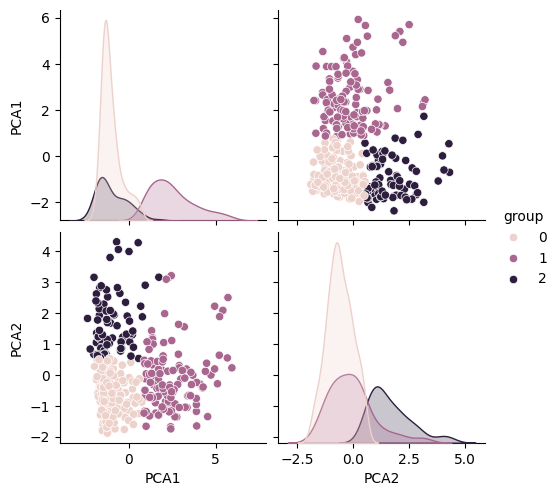

In [186]:
sns.pairplot(dfo,hue='group');


#  herichy Clustering

In [187]:
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [188]:
l=['complete','single','ward','average']
for i in l:
    al=AgglomerativeClustering(n_clusters=2,linkage=i)
    label=al.fit_predict(df1)
    score=silhouette_score(df1,label)
    print(f" linkage  {i} score : {score*100}")

 linkage  complete score : 44.50655529792784
 linkage  single score : 39.51225335729453
 linkage  ward score : 37.42031244861677
 linkage  average score : 50.3728684981746


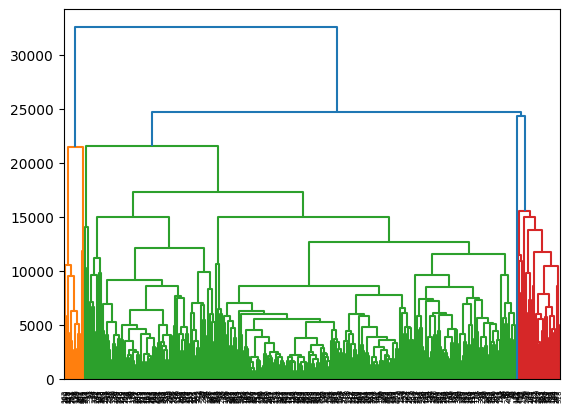

In [189]:
sc.dendrogram(sc.linkage(df1,method='average'))
plt.show()

In [190]:
al=AgglomerativeClustering(n_clusters=2,linkage='average')
df1['cluster']=al.fit_predict(df1)

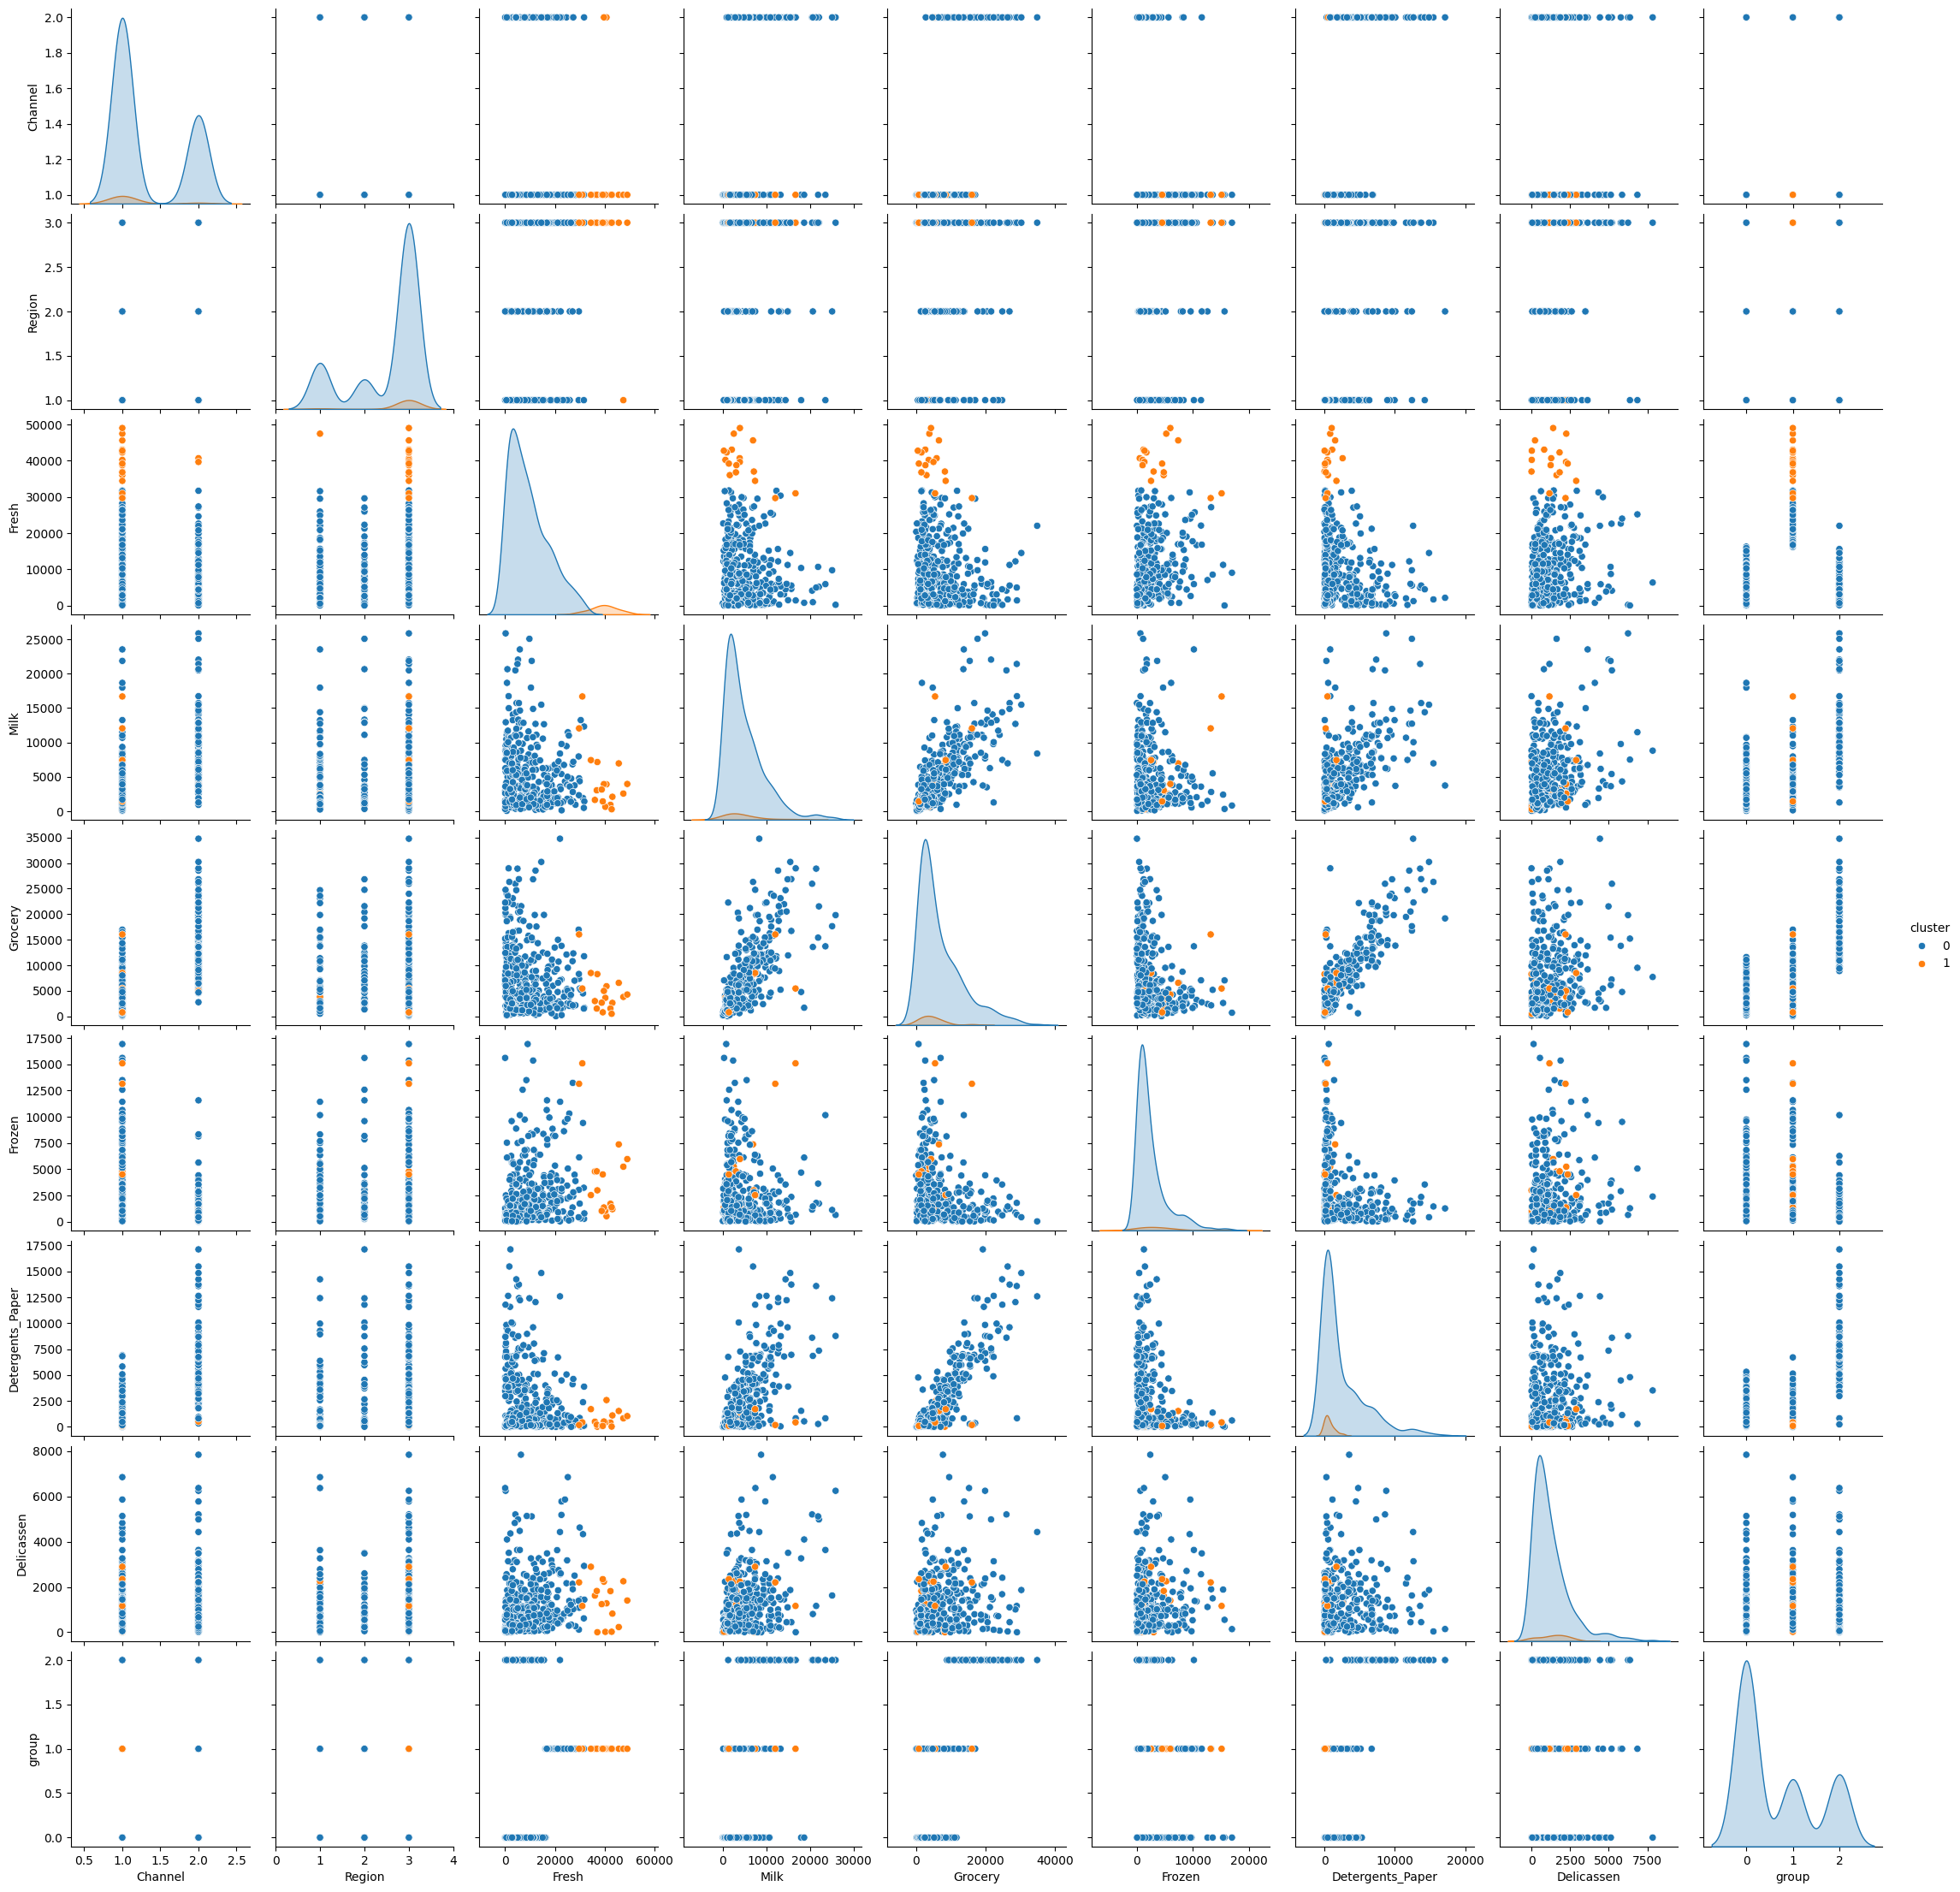

In [191]:
sns.pairplot(df1,hue='cluster');

In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
c=scaled.fit_transform(df1)
pca=PCA(n_components=2)
pca.fit_transform(c)
df1=pd.DataFrame(pca.fit_transform(c),columns=['PCA1','PCA2'])
ac=AgglomerativeClustering(n_clusters=2,linkage='single')
df1['group']=ac.fit_predict(df1)
print(f" {pca.explained_variance_ratio_ *100}")

 [39.10496357 17.94764617]


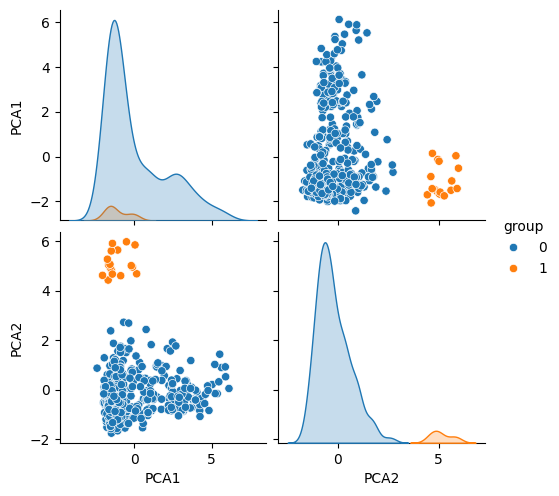

In [193]:
sns.pairplot(df1,hue='group');

# DBSCAN

In [194]:
from sklearn.cluster import DBSCAN

In [195]:
db=DBSCAN(eps=0.5,min_samples=5)
df1['group']=db.fit_predict(df1)

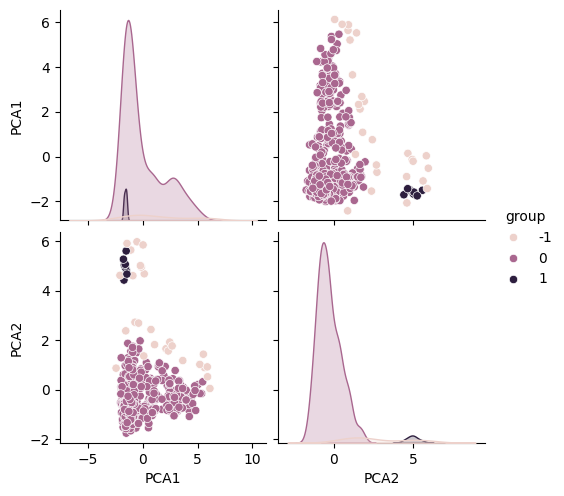

In [196]:
sns.pairplot(df1,hue='group');